# Linear Regression

#### The dataset used in the notebook is about , company is trying to focus their efforts on their mobile app experience or thier website

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customers = pd.read_csv("Ecommerce Customers.csv")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.shape

(500, 8)

#### Summary of Numerical Variables
- **Count** = Number of non-missing entries/rows
- **Mean** = The average value for each column
- **std** = The standard deviation, indicating the spread of data
- **min** = The smallest value in each column.
- **25%, 50% (median), 75%** = Percentiles that describe the distribution of value
- **max** = The largest value in each column.


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### EDA - Exploratory Data Analysis

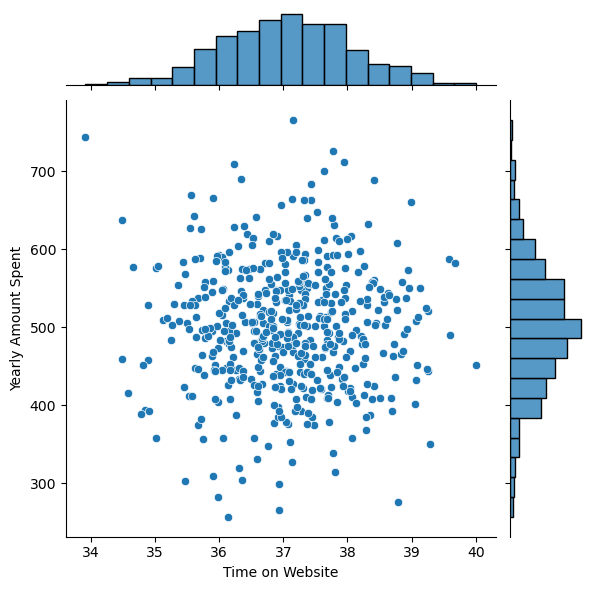

In [7]:
sns.jointplot(x='Time on Website', y = 'Yearly Amount Spent',data=customers)
plt.show()

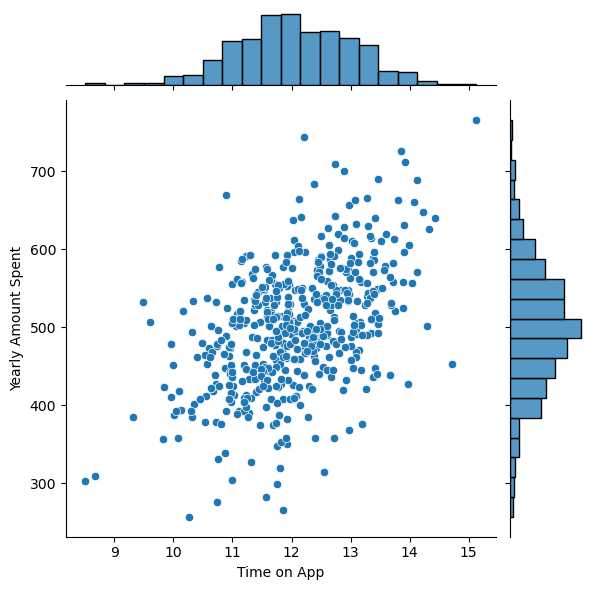

In [8]:
sns.jointplot(x="Time on App",y='Yearly Amount Spent',data=customers)
plt.show()

In [10]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


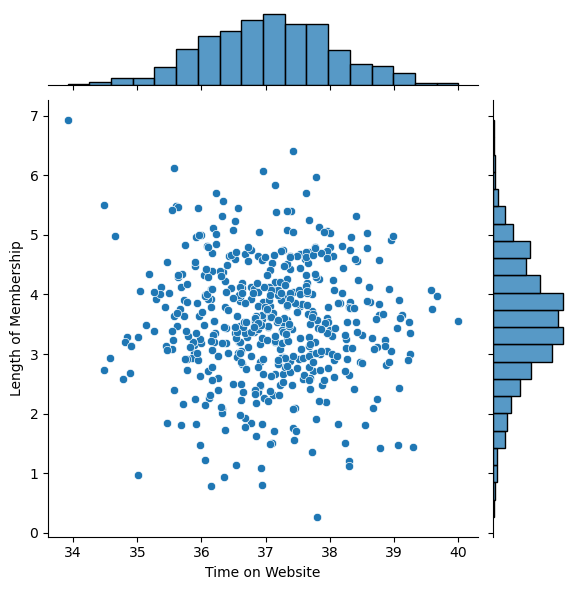

In [20]:
sns.jointplot(x="Time on Website",y='Length of Membership', data = customers)
plt.show()

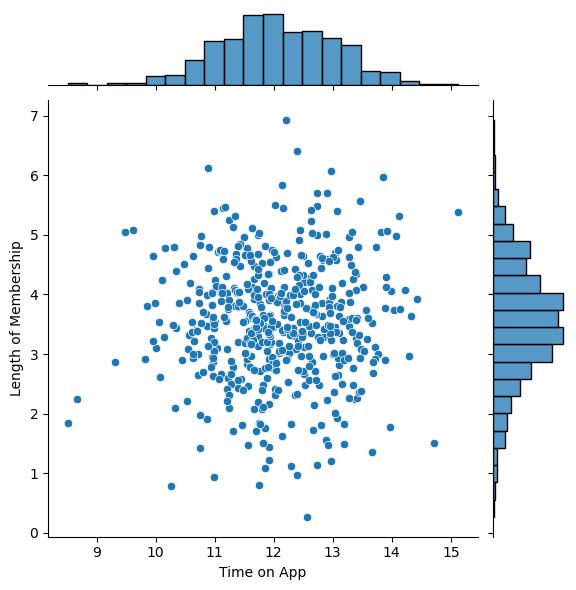

In [14]:
sns.jointplot(x="Time on App",y='Length of Membership', data = customers)
plt.show()

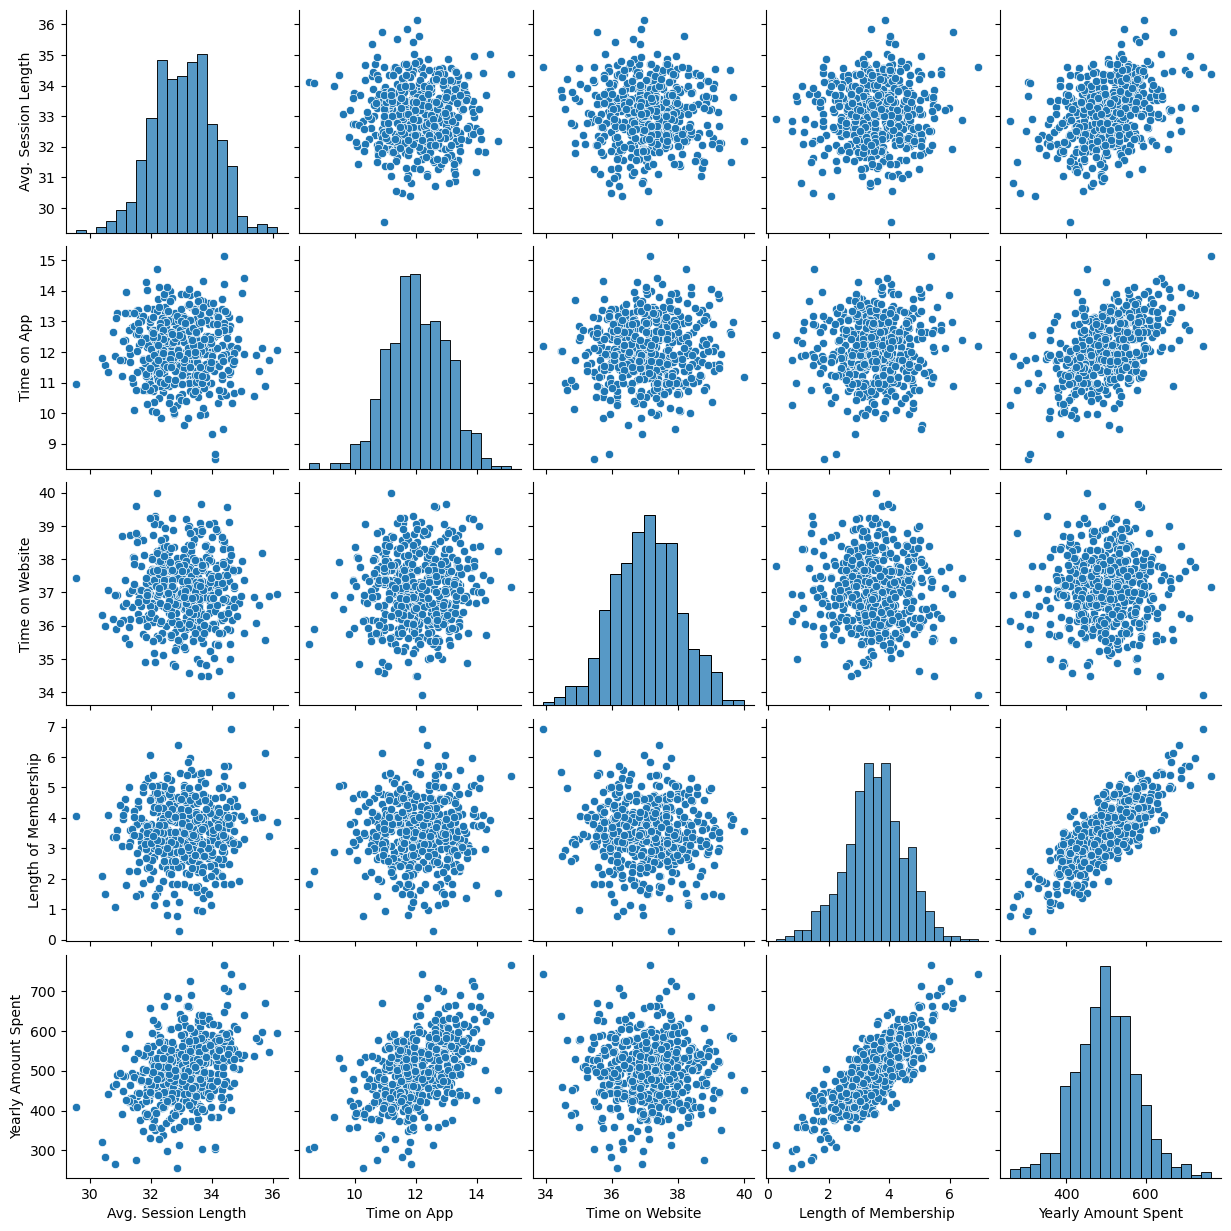

In [17]:
sns.pairplot(customers)
plt.show()

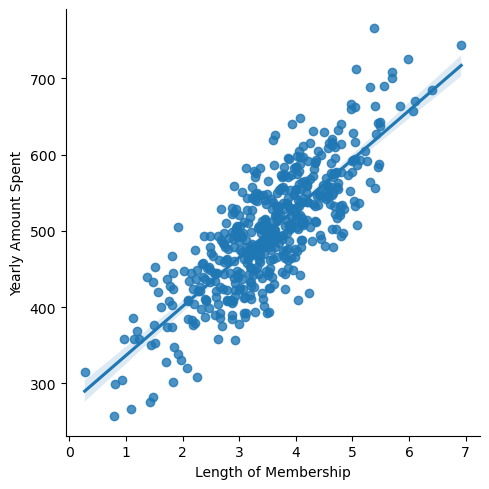

In [21]:
sns.lmplot(x ='Length of Membership', y= 'Yearly Amount Spent', data =customers)
plt.show()

### Training & Testing Data

In [22]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [23]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

### Training the model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
print(lr.coef_)
print(lr.intercept_)

[25.98154972 38.59015875  0.19040528 61.27909654]
-1047.932782250239


### Predicting Test data

In [33]:
predictions = lr.predict(X_test)

**Create a scatterplot in between real test values and predicted values**

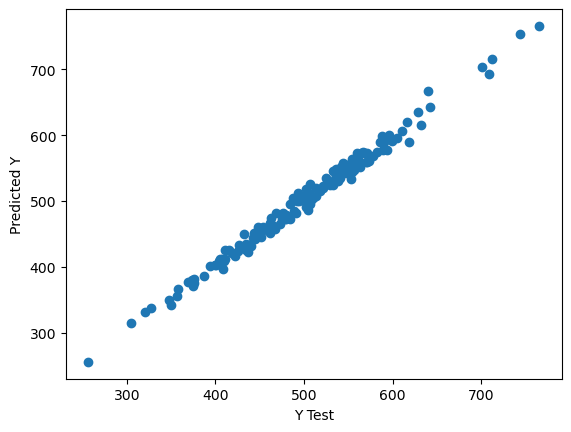

In [36]:
plt.scatter(y_test, predictions)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

### Evaluating the Model

In [37]:
from sklearn import metrics

In [40]:
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,predictions))
print("Mean Squarred Error :",metrics.mean_squared_error(y_test,predictions))
print("Root Mean Sqaurred Error :",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error : 7.228148653430841
Mean Squarred Error : 79.81305165097457
Root Mean Sqaurred Error : 8.93381506697864


In [41]:
print("R2 Score",metrics.r2_score(y_test,predictions))

R2 Score 0.9890046246741234


### Residuals

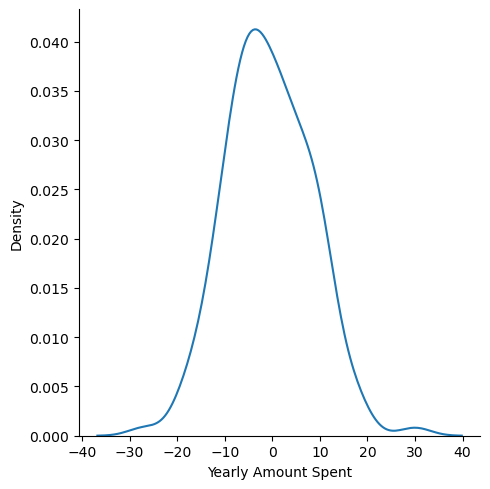

-0.7254316237995385


In [45]:
sns.displot(y_test-predictions,kind='kde')
plt.show()
print(np.mean(y_test-predictions))